### Bizbuysell Data Wrangling & Exploration 3

https://www.springboard.com/archeio/download/2c28c1ea344a4f71a7489f3b8ce78755/
https://docs.google.com/document/d/1ySJxTqB79npcJZ2VQSE4PZEydSYYWI5IvNcwrCKpkto/edit

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import seaborn as sns

### Load dataset

In [3]:
df_in=pd.read_parquet('data/bizbuysell.dataset.2.parquet')

In [4]:
df_in.shape

(252852, 31)

In [5]:
df_in.head()

,id,src,url,title,desc,local,region,location,title_loc,categories,...,STATE_NUMERIC,STATE_ALPHA,COUNTY_SEQUENCE,COUNTY_NUMERIC,COUNTY_NAME,PRIMARY_LATITUDE,PRIMARY_LONGITUDE,DATE_CREATED,DATE_EDITED,STATE_NAME
0,2067319.0,details,https://www.bizbuysell.com/Business-Real-Estat...,Popular Marina in Central New Jersey in Middle...,It is fully owned by a man and his wife since ...,Middlesex,New Jersey,"Middlesex County, NJ","Central New Jersey in Middlesex County, New Je...","[Real Estate For Sale, New Jersey, Marinas and...",...,34.0,NJ,1.0,23.0,Middlesex,40.572603,-74.492654,09/08/1979,03/17/2008,New Jersey
1,1990890.0,details,https://www.bizbuysell.com/Business-Real-Estat...,"High Exposure in Mays Landing, New Jersey - Bi...",AMAZING OPPORTUNITY! Priced to sell and ready ...,Mays Landing,New Jersey,"Mays Landing, NJ (Atlantic County)","Mays Landing, New Jersey","[Real Estate For Sale, New Jersey, Other, Mays...",...,34.0,NJ,1.0,1.0,Atlantic,39.452339,-74.727663,09/08/1979,12/06/2013,New Jersey
2,2050006.0,details,https://www.bizbuysell.com/Business-Real-Estat...,"Rental Units with Real Estate in Randolph, New...",This is a 6 unit Airbnb with an average occupa...,Randolph,New York,"Randolph, NY (Cattaraugus County)","Randolph, New York","[Real Estate For Sale, New York, Hotels, Rando...",...,36.0,NY,1.0,9.0,Cattaraugus,42.162005,-78.975317,01/23/1980,11/08/2019,New York
3,2039720.0,details,https://www.bizbuysell.com/Business-Real-Estat...,"Duplex, Short term or Long term in Pinellas Co...",Rare Largo/Seminole area duplex centrally loca...,Pinellas,Florida,"Pinellas County, FL","Pinellas County, Florida","[Real Estate For Sale, Florida, Other, Pinella...",...,12.0,FL,1.0,103.0,Pinellas,27.905111,-82.799568,08/28/1987,06/04/2021,Florida
4,1576680.0,details,https://www.bizbuysell.com/Business-Real-Estat...,"Major Price Reduction Rest/Tavern/ 13,000sq. f...",Price reduced to $850. 000 MAKE AN OFFER!!!!!!...,Baltimore,Maryland,"Baltimore, MD (Baltimore City County)","Baltimore, Maryland","[Real Estate For Sale, Maryland, Bars, Pubs an...",...,24.0,MD,1.0,510.0,Baltimore (city),39.290385,-76.612189,09/12/1979,03/17/2008,Maryland


### Drop duplicate or missing listing ids

In [6]:
dfa=df_in.drop_duplicates('id')
dfa=dfa.dropna(subset=['id'])

In [7]:
dfa.shape

(33774, 31)

### Drop missing/zero/negative price

In [8]:
dfb=dfa.dropna(subset=['price'])
dfb=dfb.query('price > 0')

In [9]:
dfb.shape

(33570, 31)

### Get rid of franchise, lease, auction, rent

In [10]:
dfc=dfb
dfc['franchise']=dfc.title.str.contains("franchise", case=False)
dfc['lease']=dfc.title.str.contains("lease", case=False)
dfc['auction']=dfc.title.str.contains("auction", case= False)
dfc['rent']=dfc.title.str.contains("rent", case= False)

In [11]:
dfc=dfc.loc[(dfc.franchise==False)&(dfc.lease==False)&(dfc.auction==False)&(dfc.rent==False)]
#dfc=dfc.loc[(dfc.lease==False)&(dfc.auction==False)&(dfc.rent==False)]

In [12]:
dfc.shape

(30632, 35)

### Get rid of price anomalies with IQR

In [13]:
Q1 = dfc.price.quantile(0.25)
Q3 = dfc.price.quantile(0.75)
IQR = Q3 - Q1

dfd = dfc.query('(@Q1 - 1.5 * @IQR) <= price <= (@Q3 + 1.5 * @IQR)')

In [14]:
dfd.shape

(27316, 35)

<AxesSubplot:xlabel='price', ylabel='Count'>

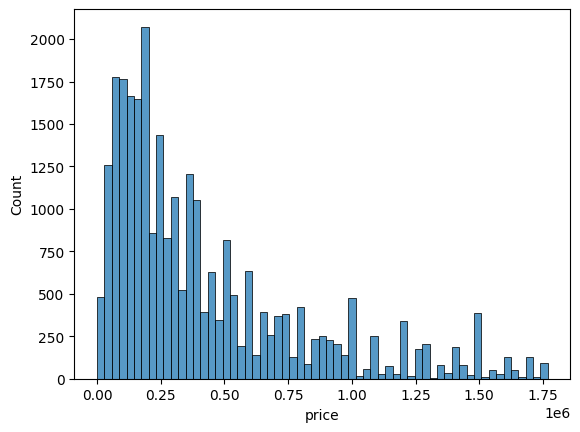

In [15]:
sns.histplot(data=dfd, x="price")

In [16]:
dfd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27316 entries, 1 to 76314
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 27316 non-null  float64
 1   src                27316 non-null  object 
 2   url                27316 non-null  object 
 3   title              27316 non-null  object 
 4   desc               27316 non-null  object 
 5   local              27316 non-null  object 
 6   region             27316 non-null  object 
 7   location           27316 non-null  object 
 8   title_loc          27281 non-null  object 
 9   categories         27316 non-null  object 
 10  similar            27316 non-null  object 
 11  details            27316 non-null  object 
 12  financials         27316 non-null  object 
 13  price              27316 non-null  float64
 14  FEATURE_ID         27316 non-null  float64
 15  FEATURE_NAME       27316 non-null  object 
 16  FEATURE_CLASS      273

In [17]:
df_out=dfd

### Save processed data to parquet file

In [18]:
df_out.to_parquet('data/bizbuysell.dataset.3.parquet')